---
# 프로젝트명 : 확률과 손실(비용)함수로 배우는 최적화
## 프로젝트목표
    - 확률변수와 MLE 이해
    - 반응함수와 단순회귀모형 이해
    - 편미분 개념과 경사하강법 이해

## 프로젝트구성
    - 서술형 : 최대우도추정량, 불편추정량
    - 서술형 : 오차정규성, 오차등분산성, 반응함수, 회귀선
    - Python으로 최소제곱법 구현
    - pyplot으로 최소제곱법 시각화

- 작성자: 이정훈 감수자
---

# (서술형)과제1
## 서로 독립인 확률변수 $X_i(i=1,2,...,n)$이 성공확률  p인 베르누이(Bernoulli)분포를 따른다. 다음 물음에 답하시오.



(1) 최대우도추정량(MLE)에 대해 약술하시오


[풀이]

MLE란 LIkelihood를 최대로 만드는 모수의 값이다. 
Likelihood 란 가능도함수,우도함수라고도 불리우며 확률분포함수는 뮤가 주어졌을때 X에 대한 함수이고 가능도 함수란 X가 주어졌을때 뮤에 대한 함수이다. 뮤는 평균을 의미한다. 확률분포함수는 모수를 알때 확률변수의 실현값을 예측하는것이고 Likelihood 는 확률변수의 실현값을 알 때 (데이터가있을때) 모수를 추정하고자 한다. 
Likelihood function 에 미분에 용이하도록 Log Likelihood 를 구성하고 미분을 실행하고
미분한 함수가 0이 되게하는 뮤제로햇을 구한다.


(2)  $S= \sum_{i=1}^n X_i$라고 할 때,  $(\frac{S}{n})^2$이 $p^2$의 최대우도추정량(MLE)임을 보이시오.


[풀이]

In [ ]:
S는 Xi의 n길이 만큼의 합인데 


(3)$(\frac{S}{n})^2$이 $p^2$의 불편추정량인지 판별하고 그 이유에 대해서 서술하시오.



[풀이] 모수 θ의 추정량을  으로 나타낼 때,  의 기댓값이 인 경우를 말한다.    이 경우  를 에 대한 불편추정량이라고 한다.


# (서술형)과제2
## 종속변수가 질적변수인 회귀모형 $y_i=\beta_0+\beta_i x_i+\epsilon_i$, ($i=1,2,..., n$이고 $y_i=0$또는 1)에서 아래의 질문에 답하시오.


(1) 오차의 정규성이 만족하지 않음을 보이고, 이러한 경우 발생하는 문제점을 서술하시오.


[풀이]


(2) 오차의 등분산성 가정이 만족하지 않음을 보이고, 이러한 경우 발생하는 문제점과 그 해결방안을 서술하시오.


[풀이] 등분산을 균등분산을 의미한다. 즉, 분산이 로 일정한 경우를 말한다.


(3) $E(\epsilon_i)=0$일 때 반응함수 $E(y_i)$를 계산하시오.


[풀이]


(4) [실습1] 
생산 담당자가 조립라인의 직원 5명을 대상으로 시간당 생산성과 업무적성을 조사한 자료가 다음과 같다.
직원:A, B, C, D, E; x=업무적성 점수; y=시간당 생산품 개수

A; x=12, y=55
B; x=14, y=63
C; x=17, y=67
D; x=16, y=70
E; x=11, y=51

회귀직선의 기울기와 회귀직선의 y절편을 구하고, 추정을 위한 회귀직선을 구하시오.


[풀이]

In [98]:
data2 = [[12,55],[14,63],[17,67],[16,70],[11,51]]

기울기 3.0
y절편 19.200000000000003


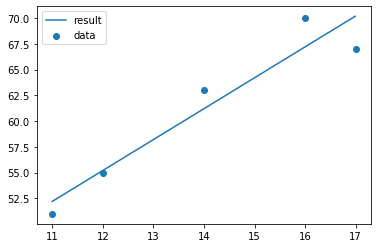

In [102]:
x_data2 = [x_row[0] for x_row in data2]
y_data2 = [y_row[1] for y_row in data2]

xAvg2 = np.mean(x_data2)
yAvg2 = np.mean(y_data2)

#분모
divisor2 = sum([(i - xAvg2) ** 2 for i in x_data2])
#분자
dividend2 = 0
for i in range(len(x_data2)):
    dividend2 += (x_data2[i] - xAvg2) * (y_data2[i] - yAvg2)

a2 = dividend2 / divisor2
b2 = yAvg2 - (xAvg2 * a2)

line_x2 = np.arange(min(x_data2), max(x_data2), 0.01)
gradient2 = a2 * line_x2 + b2


print("기울기", a2)
print("y절편", b2)

plt.scatter(x_data2,y_data2,label="data")
plt.plot(line_x2, gradient2 ,label="result")
plt.legend()
plt.show()




# (코딩)과제3 - 설명

## 경사하강법을 통한 오차 제곱의 최소인 a, b 구하기



## 경사하강법이란?

n개 데이터의 점 각각에서 오차 제곱의 합은 다음과 같이 계산합니다.

$$E=\sum_{i=1}^{n} (y_k-f(x_k))^2_i$$

이 때, E의 최솟값을 구하는 것이기 때문에 1/2배 하여도 문제가 없습니다.

$$E=\frac{1}{2}\sum_{i=1}^{n} (y_k-f(x_k))^2_i$$

이제 선형회귀를 머신러닝에 적용하기 위하여 위 식을 머신러닝의 '손실함수'라 하면 미분했을때 다음과 같다.

$$f(x_k)=ax_k+b$$

즉, a, b라는 변수가 2개인 상태로 손실함수 E를 고려하면 E의 최솟값은 a, b의 편미분을 통하여 구할 수 있다.

$$\mathbf{X_1} = \left[\begin{array}
{rr}
\delta a & \delta b \\
\end{array}\right]
$$

$$\mathbf{X_2} = \left[\begin{array}
{rr}
E_a & E_b \\
\end{array}\right]
$$

$$ \mathbf{X_1}=-\eta \mathbf{X_2}$$

f(x_k)를 a, b에  대하여 편미분을 하면 다음이 성립한다.

$$f_a=x_k, f_b=1$$

그러므로 손실함수 E를 a, b에 대하여 편미분하면 다음이 성립한다.

$$E_a=\sum_{i=1}^{n} (f(x_k)-y_k)x_k$$
$$E_b=\sum_{i=1}^{n} (f(x_k)-y_k)$$

이제 손실함숫값이 크게 변하지 않을 때까지 반복하여 계산하면 오차 제곱의 합이 최소일 때 a, b를 찾을 수 있다.



# (코딩)과제3
## 주어진 데이터에 대하여 초기값 a=0.5, b=1.5 학습률=0.006으로 하여 직접 코딩을 하여서 최소제곱법을 구현하고 시각화하시오.

In [28]:
data=[[0, 1.5], [2, 1.7], [3, 2.1], [5, 2.2], [6, 2.8], [7, 2.9], [9, 3.2], [11, 3.7]]
data

[[0, 1.5],
 [2, 1.7],
 [3, 2.1],
 [5, 2.2],
 [6, 2.8],
 [7, 2.9],
 [9, 3.2],
 [11, 3.7]]

## STEP 1.

기울기 0.20519307589880162
y절편 1.4095872170439414


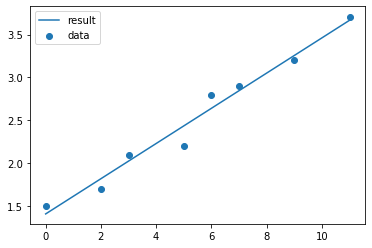

In [90]:
data=[[0, 1.5], [2, 1.7], [3, 2.1], [5, 2.2], [6, 2.8], [7, 2.9], [9, 3.2], [11, 3.7]]
import matplotlib.pyplot as plt
import numpy as np

# (코드입력)함수를 정의합니다.
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

xAvg = np.mean(x_data)
yAvg = np.mean(y_data)

#분모
divisor = sum([(i - xAvg) ** 2 for i in x_data])
#분자
dividend = 0
for i in range(len(x_data)):
    dividend += (x_data[i] - xAvg) * (y_data[i] - yAvg)

a = dividend / divisor
b = yAvg - (xAvg * a)

line_x = np.arange(min(x_data), max(x_data), 0.01)
gradient = a * line_x + b

print("기울기", a)
print("y절편", b)

plt.scatter(x_data,y_data,label="data")
plt.plot(line_x, gradient ,label="result")
plt.legend()
plt.show()

데이터에 대한 최소 제곱법을 했습니다. 

## STEP 2.

In [112]:
import tensorflow as tf
eta = 0.006 #학습률
a, b = 0.5, 1.5 #기울기(a), 절편(b)

# (코드입력)오차 제곱의 합이 최소일 때의 a, b 를 for문으로 출력하고, plt를 사용하여 시각화합니다.

x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

y = a * np.array(x_data) + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

AttributeError: module 'tensorflow' has no attribute 'sqrt'

In [103]:
x_data

[0, 2, 3, 5, 6, 7, 9, 11]

In [108]:
tf_upgrade_v2 --infile tensorfoo.py --outfile tensorfoo-upgraded.py

SyntaxError: invalid syntax (<ipython-input-108-11bc0ea1790c>, line 1)